In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cohort Retention Analysis

Analisis yang dilakukan untuk memantau perilaku user dalam transaksi kembali pada periode tertentu dari periode transaksi awal mereka.

Analisis Cohort Retention memantau apakah pengguna melakukan transaksi kembali pada periode tertentu setelah akuisisi, tanpa mensyaratkan aktivitas yang berkelanjutan secara berturut-turut di setiap periode antaranya.

In [2]:
df = pd.read_csv('dataset_kulina.csv')
df

,id,order_date,user_id
0,114363,2019-01-01,53424
1,114364,2019-01-01,77226
2,114366,2019-01-01,67632
3,114369,2019-01-01,63167
4,114370,2019-01-01,32047
...,...,...,...
192908,326833,2019-12-27,131981
192909,326834,2019-12-27,54449
192910,326835,2019-12-27,52375
192911,326837,2019-12-27,118653


In [3]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_date']

,order_date
0,2019-01-01
1,2019-01-01
2,2019-01-01
3,2019-01-01
4,2019-01-01
...,...
192908,2019-12-27
192909,2019-12-27
192910,2019-12-27
192911,2019-12-27


In [4]:
df['order_month'] = df['order_date'].dt.to_period('M')

In [6]:
user_cohort = df.groupby('user_id')['order_month'].min().reset_index()
user_cohort.columns = ['user_id', 'cohort_month']

In [7]:
user_cohort

,user_id,cohort_month
0,6,2019-06
1,9,2019-06
2,12,2019-01
3,82,2019-05
4,98,2019-01
...,...,...
28126,139507,2019-12
28127,139530,2019-12
28128,139541,2019-12
28129,139596,2019-12


User Cohort

User Cohort merupakan bulan pertama user order melalui aplikasi Kulina

In [8]:
df_merge = df.merge(user_cohort, on='user_id')

In [9]:
df_merge

,id,order_date,user_id,order_month,cohort_month
0,114363,2019-01-01,53424,2019-01,2019-01
1,114364,2019-01-01,77226,2019-01,2019-01
2,114366,2019-01-01,67632,2019-01,2019-01
3,114369,2019-01-01,63167,2019-01,2019-01
4,114370,2019-01-01,32047,2019-01,2019-01
...,...,...,...,...,...
192908,326833,2019-12-27,131981,2019-12,2019-11
192909,326834,2019-12-27,54449,2019-12,2019-12
192910,326835,2019-12-27,52375,2019-12,2019-01
192911,326837,2019-12-27,118653,2019-12,2019-09


In [10]:
# Hitung selisih antara bulan order dengan bulan pertama order
df_merge['cohort_index'] = (df_merge['order_month'] - df_merge['cohort_month']).apply(lambda x: x.n)

# Hitung unique user per-cohort per-cohort_index
cohort_data = df_merge.groupby(['cohort_month', 'cohort_index'])['user_id'].nunique().reset_index()
cohort_data.columns = ['cohort_month', 'cohort_index', 'num_users']

In [11]:
cohort_data

,cohort_month,cohort_index,num_users
0,2019-01,0,4520
1,2019-01,1,2093
2,2019-01,2,1673
3,2019-01,3,1342
4,2019-01,4,1066
...,...,...,...
73,2019-10,1,633
74,2019-10,2,405
75,2019-11,0,1442
76,2019-11,1,527


In [12]:
# Pivot data dan buat jadi table
cohort_table = cohort_data.pivot(index='cohort_month',
                                   columns='cohort_index',
                                   values='num_users')

In [13]:
cohort_size = cohort_table.iloc[:, 0]
retention_table = cohort_table.divide(cohort_size, axis=0) * 100

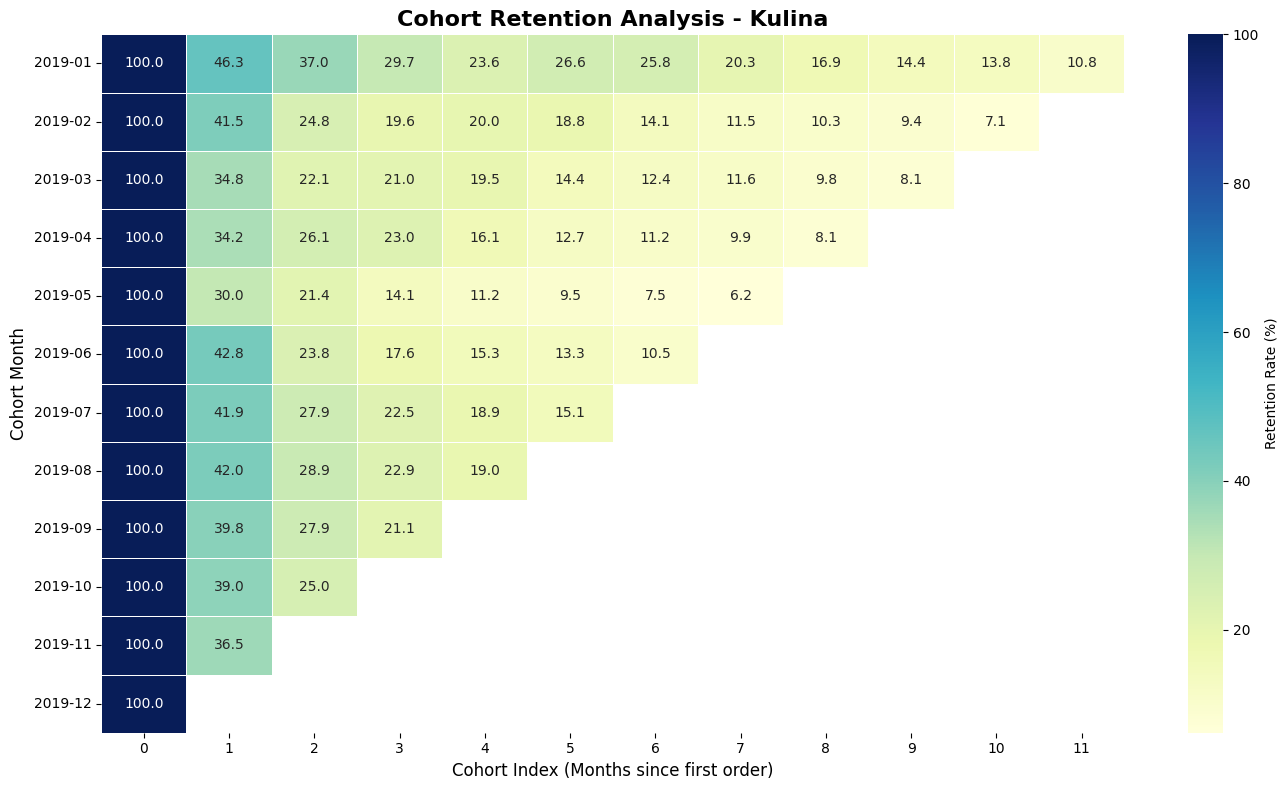

In [14]:
plt.figure(figsize=(14, 8))
sns.heatmap(retention_table,
            annot=True,
            fmt='.1f',
            cmap='YlGnBu',
            linewidths=0.5,
            cbar_kws={'label': 'Retention Rate (%)'})

plt.title('Cohort Retention Analysis - Kulina', fontsize=16, fontweight='bold')
plt.xlabel('Cohort Index (Months since first order)', fontsize=12)
plt.ylabel('Cohort Month', fontsize=12)
plt.tight_layout()
plt.savefig('cohort_retention.png', dpi=300, bbox_inches='tight')
plt.show()

Analisis Statistik Deskriptif:

1. **Pola Penurunan Retensi Pelanggan**

Dari visualisasi heatmap, dapat dilihat bahwa terjadinya penurunan yang sangat signifikan pada bulan ke-1 (dari 100% hingga ~40%). Ini artinya 60% pelanggan hilang setelah pembelian pertamanya menggunakan Kulina. Penurunan ini yang paling signifikan di antara keseluruhan siklus pelanggan

Setelah mengalami penurunan retensi yang sangat signifikan, pada bulan selanjutnya, retention rate masih terus mengalami penurunan tetapi dengan laju yang lebih lambat.

Dari data tersebut juga dapat dilihat yang paling menarik adalah pada bulan ke-8, ke-9, dan seterusnya mengalami retention rate yang cenderung stabil. Hal ini menandakan bahwa Kulina sudah memiliki customer loyal sekitar 10% atau 1 dari 10 customer lainnya.


2. **Perbedaan Performa Antar Cohort**

Heatmap tersebut juga menunjukkan perbandingan performa antar Cohort. Dari heatmap tersebut dapat dilihat bahwa cohort retention bulan Januari memiliki nilai terbaik (46.3%), sedangkan pada bulan Mei memiliki nilai terburuk (30.0%). Perbedaan sebesar 16.3% ini menunjukkan bahwa pengaruh timing akuisisi pelanggan dan juga faktor eksternal lainnya sangat mempengaruhi nilai cohort retention.

Jika dilihat per-quartal, kita dapat menyimpulkan bahwa Q3 memiliki nilai cohort retention terbaik di bulan 1 nya dengan rata-rata 41.2%. Sedangkan pada Q2 memiliki nilai cohort retention terburuk, yaitu dengan rata-rata 35.7%. Dari analisis per-quartal juga dapat diperhatikan bahwa pola musiman juga perlu dipertimbangkan dalam perencanaan akuisisi pelanggan.